In [248]:
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K


In [249]:
df = pd.read_csv('Data/Preprocessed/NYC_newyork_city_clean.csv')

In [250]:
# Load the saved model
All_cities_model = load_model('All_cities_model.h5')

In [251]:
# Remove the last layer from the model
All_cities_model.pop()

In [252]:
# Add a new output layer for your specific task
new_output_layer = Dense(1, activation='linear')
All_cities_model.add(new_output_layer)

Epoch 1/10
69/69 [==============================] - 1s 3ms/step - loss: 123.2023 - val_loss: 1.2692
Epoch 2/10
69/69 [==============================] - 0s 2ms/step - loss: 0.2418 - val_loss: 0.1485
Epoch 3/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1326 - val_loss: 0.1462
Epoch 4/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1872 - val_loss: 0.1317
Epoch 5/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1823
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1908
Epoch 7/10
69/69 [==============================] - 0s 3ms/step - loss: 0.1318 - val_loss: 0.1546
Epoch 8/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.3448
Epoch 9/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1326 - val_loss: 0.1899
Epoch 10/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1252


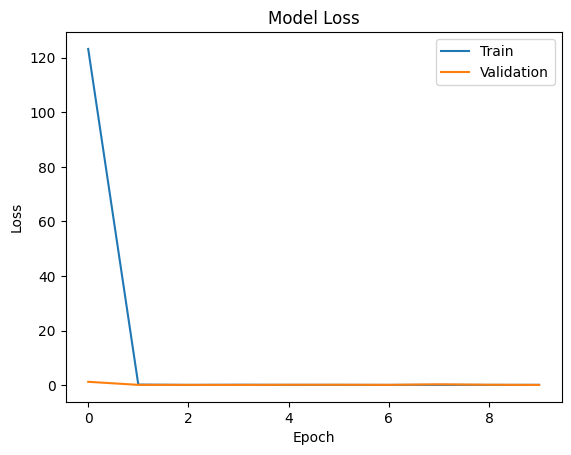

In [290]:
X = df.drop(columns=['price', 'city'], axis=1)  # Features
y = df['price']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Compile the model for transfer learning
optimizer = Adam(learning_rate=0.0001)
All_cities_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Assuming X_new_data and y_new_data are your new data and labels
history = All_cities_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

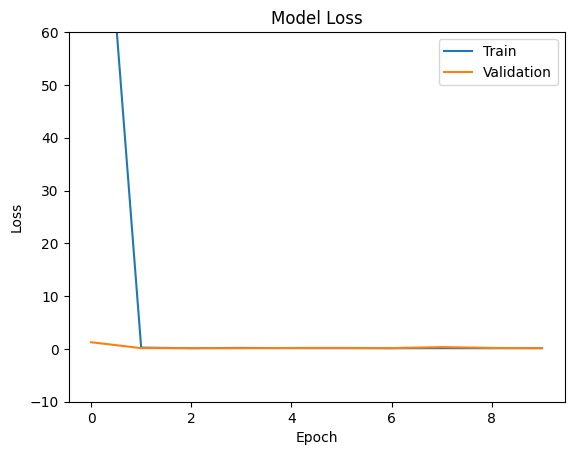

In [292]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(-10,60)
plt.show()

In [293]:
r2 = history.history['loss']

In [294]:
predictions_train = All_cities_model.predict(X_train)
pd.DataFrame(predictions_train , y_train)

predictions_test = All_cities_model.predict(X_test)
pd.DataFrame(predictions_test , y_test)

# Evaluate the model on test data
loss = All_cities_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

mse = mean_squared_error(y_train, predictions_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_test)
r_squared_test = r2_score(y_test, predictions_test)
r_squared_train = r2_score(y_train, predictions_train)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared for test data (R²): {r_squared_test}')
print(f'R-squared for train data(R²): {r_squared_train}')

9/9 [==============================] - 0s 1ms/step
Test Loss: 0.09613324701786041
Mean Squared Error (MSE): 0.10820972617796998
Root Mean Squared Error (RMSE): 0.3289524679615126
Mean Absolute Error (MAE): 0.24296718998881373
R-squared for test data (R²): 0.9208797537443263
R-squared for train data(R²): 0.9119134902631103


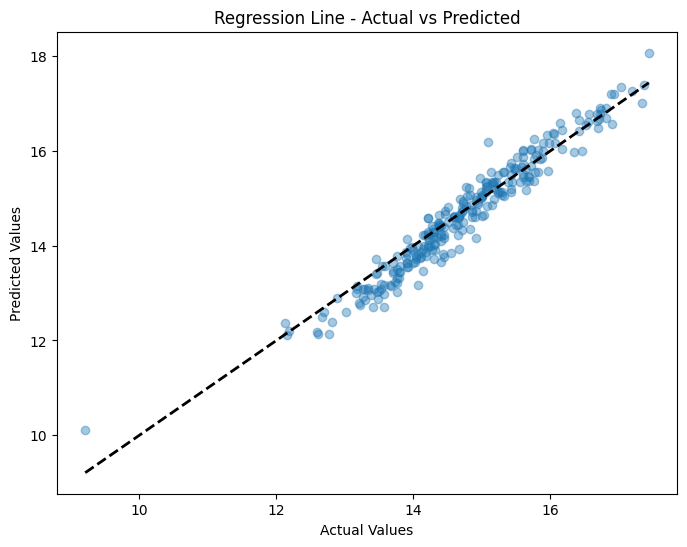

In [295]:
# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line - Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()

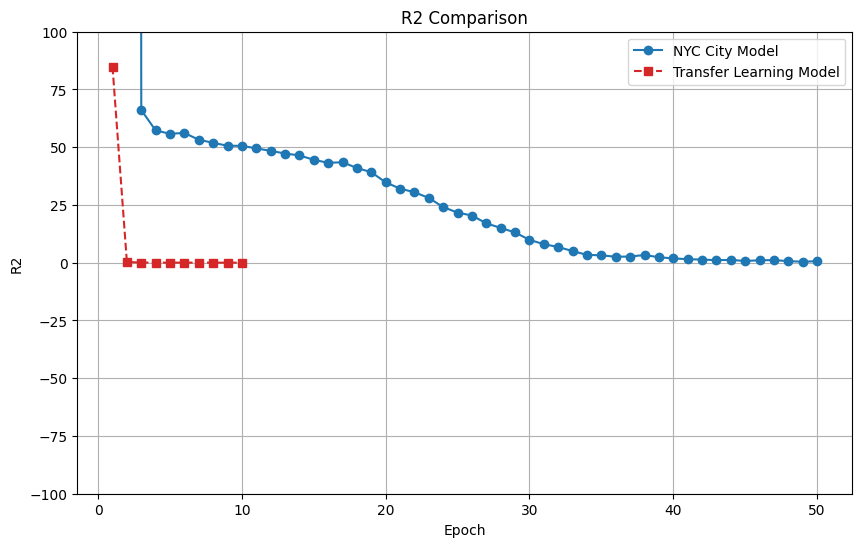

In [237]:

nyc_city_r2 = [1014865.75, 6226.49560546875, 66.10030364990234, 57.262603759765625, 55.81538009643555, 56.19330978393555, 53.22156524658203, 51.91952896118164, 50.62576675415039, 50.6163330078125, 49.49742889404297, 48.43037414550781, 47.279781341552734, 46.462162017822266, 44.54861831665039, 43.254520416259766, 43.493709564208984, 41.00631332397461, 39.19112014770508, 34.78033447265625, 32.071266174316406, 30.511276245117188, 28.046091079711914, 24.07788848876953, 21.68797492980957, 20.43239402770996, 17.036287307739258, 15.066319465637207, 13.084488868713379, 9.90832233428955, 8.017013549804688, 6.7935309410095215, 5.036808967590332, 3.4089322090148926, 3.192859172821045, 2.6017956733703613, 2.675841808319092, 3.3480963706970215, 2.368878126144409, 1.863521695137024, 1.5423330068588257, 1.353234887123108, 1.1103308200836182, 1.207449197769165, 0.7646080851554871, 1.0524051189422607, 1.1400253772735596, 0.697849690914154, 0.4232303500175476, 0.6828060150146484]


transfer_learning_r2 = r2

epochs_nyc_city = list(range(1, len(nyc_city_r2) + 1))
epochs_transfer_learning = list(range(1, len(transfer_learning_r2) + 1))

# Plot the R2 curves for the two models on the same plot
plt.figure(figsize=(10, 6))

plt.plot(epochs_nyc_city, nyc_city_r2, label='NYC City Model', linestyle='-', marker='o', color='tab:blue')
plt.plot(epochs_transfer_learning, transfer_learning_r2, label='Transfer Learning Model', linestyle='--', marker='s', color='tab:red')

plt.xlabel('Epoch')
plt.ylabel('R2')
plt.title('R2 Comparison')
plt.legend()
plt.ylim(-100, 100)
plt.grid(True)
plt.show()